In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [71]:
molinetes = pd.read_csv(r'C:\Users\Notebook Asus\Documents\Ciencia de datos\molinetes_2017.csv', delimiter=';')

In [72]:
molinetes.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
0,201701,01/01/2017,08:00:00,08:15:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN02,CASEROS,1,0,0,1,1
1,201701,01/01/2017,08:00:00,08:15:00,LINEA_H,LINEA_H_CASEROS_NORTE_TURN02,CASEROS,1,0,0,1,1
2,201701,01/01/2017,08:15:00,08:30:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN02,CASEROS,2,0,0,2,1
3,201701,01/01/2017,08:15:00,08:30:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN01,CASEROS,1,0,0,1,1
4,201701,01/01/2017,08:30:00,08:45:00,LINEA_H,LINEA_H_CASEROS_NORTE_TURN01,CASEROS,2,0,0,2,1


In [73]:
columnas_molinetes = molinetes.columns
molinetes.columns

Index(['PERIODO', 'FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ESTACION',
       'PAX_PAGOS', 'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID'],
      dtype='object')

In [74]:
molinetes['LINEA'].head

<bound method NDFrame.head of 0           LINEA_H
1           LINEA_H
2           LINEA_H
3           LINEA_H
4           LINEA_H
             ...   
11938471    LINEA_D
11938472    LINEA_D
11938473    LINEA_D
11938474    LINEA_E
11938475    LINEA_H
Name: LINEA, Length: 11938476, dtype: object>

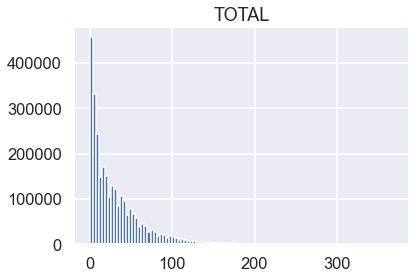

In [259]:
molinetes_b = molinetes.loc[molinetes['LINEA'] == 'LINEA_B']
hist1 = molinetes_b.hist(column='TOTAL',bins=100)


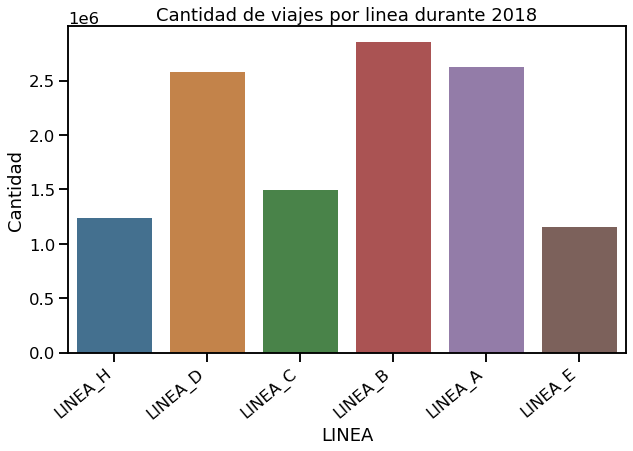

In [76]:
sns.set_context("talk")
plt.figure(figsize=(10,6))
ax = sns.countplot(x="LINEA", data=molinetes,  saturation=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Cantidad')
plt.title("Cantidad de viajes por linea durante 2018")
plt.show()

In [78]:
## Ejercicio 00 ## 

molinetes_d = molinetes.loc[molinetes['LINEA'] == 'LINEA_D']
molinetes_d

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
468843,201701,01/01/2017,08:00:00,08:15:00,LINEA_D,LINEA_D_9JULIO_S_TURN02,9 DE JULIO,1,0,0,1,6
468844,201701,01/01/2017,08:00:00,08:15:00,LINEA_D,LINEA_D_9JULIO_N_TURN02,9 DE JULIO,1,0,0,1,6
468845,201701,01/01/2017,08:00:00,08:15:00,LINEA_D,LINEA_D_9JULIO_S_TURN01,9 DE JULIO,1,0,0,1,6
468846,201701,01/01/2017,08:15:00,08:30:00,LINEA_D,LINEA_D_9JULIO_S_TURN02,9 DE JULIO,1,0,0,1,6
468847,201701,01/01/2017,08:15:00,08:30:00,LINEA_D,LINEA_D_9JULIO_S_TURN01,9 DE JULIO,2,0,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
11938469,201712,31/12/2017,22:00:00,22:15:00,LINEA_D,LINEA_D_PALERMO_TURN02,PALERMO,6,0,0,6,12
11938470,201712,31/12/2017,22:00:00,22:15:00,LINEA_D,LINEA_D_PALERMO_TURN05,PALERMO,1,0,0,1,12
11938471,201712,31/12/2017,22:00:00,22:15:00,LINEA_D,LINEA_D_PITALIA_O_TURN01,PLAZA ITALIA,17,0,0,17,11
11938472,201712,31/12/2017,22:00:00,22:15:00,LINEA_D,LINEA_D_PUEYRREDON_TURN02,PUEYRREDON.D,7,0,0,7,55


In [79]:
np.shape(molinetes_d)

(2574272, 12)

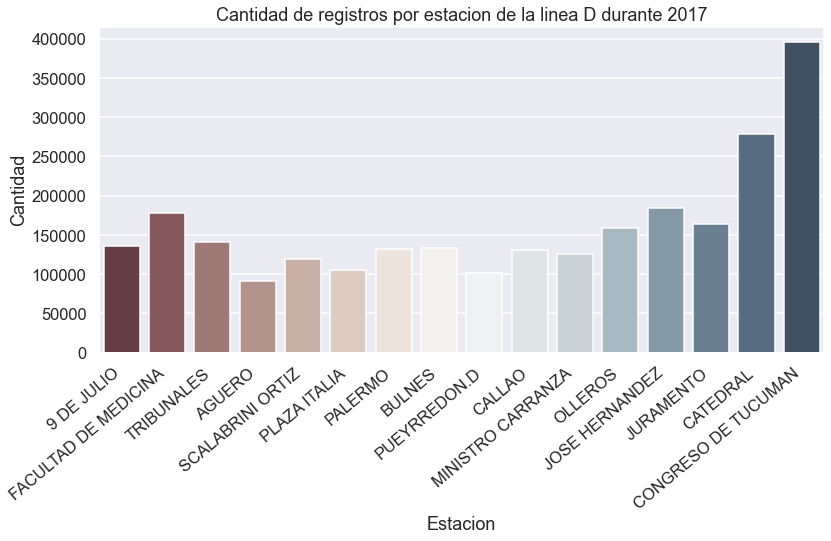

In [167]:
sns.set_context("talk")
plt.figure(figsize=(13,6))

ax = sns.countplot(x="ESTACION", data=molinetes_d,  saturation=.3,palette="RdBu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Cantidad')
ax.set_xlabel('Estacion')
plt.title("Cantidad de registros por estacion de la linea D durante 2017")
plt.show()

In [81]:
linea_d_2017 = pd.pivot_table(molinetes_d, index=["ESTACION"], values=["TOTAL"],aggfunc=[np.sum,np.mean,"count"])
# margins=True irìa al final para agregar un total abajo de todo
# linea_d_2017 = linea_d_2017.rename(columns = {'TOTAL':'Registros'}) para cambiar el nombre de la columna

In [82]:
np.shape(linea_d_2017)

(16, 3)

In [83]:
linea_d_2017

,sum,mean,count
,TOTAL,TOTAL,TOTAL
ESTACION,,,
9 DE JULIO,3083303,22.770128,135410
AGUERO,3497967,38.463713,90942
BULNES,5413032,40.547056,133500
CALLAO,4983615,38.055063,130958
CATEDRAL,10145693,36.421538,278563
CONGRESO DE TUCUMAN,10128034,25.591353,395760
FACULTAD DE MEDICINA,5443237,30.592701,177926
JOSE HERNANDEZ,3778951,20.502566,184316


In [84]:
#linea_d_2017.max() para mostrar el mayor de cada columna

In [85]:
## Ejercicio 01 ## 

linea_d_2017.idxmax()

sum    TOTAL               CATEDRAL
mean   TOTAL                PALERMO
count  TOTAL    CONGRESO DE TUCUMAN
dtype: object

In [91]:
## Ejercicio 02 ## 

linea_d_Catedral = molinetes_d.loc[molinetes_d['ESTACION'] == "CATEDRAL"]

In [92]:
linea_d_Catedral

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
8201462,201701,01/01/2017,08:00:00,08:15:00,LINEA_D,LINEA_D_CATEDRAL_O_TURN05,CATEDRAL,0,0,0,0,69
8201463,201701,01/01/2017,08:00:00,08:15:00,LINEA_D,LINEA_D_CATEDRAL_O_TURN02,CATEDRAL,6,0,0,6,69
8201464,201701,01/01/2017,08:00:00,08:15:00,LINEA_D,LINEA_D_CATEDRAL_O_TURN01,CATEDRAL,2,0,0,2,69
8201465,201701,01/01/2017,08:15:00,08:30:00,LINEA_D,LINEA_D_CATEDRAL_O_TURN02,CATEDRAL,1,0,0,1,69
8201466,201701,01/01/2017,08:15:00,08:30:00,LINEA_D,LINEA_D_CATEDRAL_O_TURN05,CATEDRAL,1,0,0,1,69
...,...,...,...,...,...,...,...,...,...,...,...,...
11938050,201712,31/12/2017,21:45:00,22:00:00,LINEA_D,LINEA_D_CATEDRAL_O_TURN01,CATEDRAL,2,0,0,2,69
11938097,201712,31/12/2017,21:45:00,22:00:00,LINEA_D,LINEA_D_CATEDRAL_O_TURN08,CATEDRAL,1,0,0,1,69
11938126,201712,31/12/2017,21:45:00,22:00:00,LINEA_D,LINEA_D_CATEDRAL_O_TURN02,CATEDRAL,4,0,0,4,69
11938167,201712,31/12/2017,21:45:00,22:00:00,LINEA_D,LINEA_D_CATEDRAL_O_TURN03,CATEDRAL,1,0,0,1,69


In [213]:
linea_d_Catedralxmes = pd.pivot_table(linea_d_Catedral, index=["PERIODO"], values=["TOTAL"], aggfunc=[np.sum])

In [214]:
linea_d_Catedralxmes

,sum
,TOTAL
PERIODO,
201701,700979
201702,647163
201703,945638
201704,796270
201705,943268
201706,895885
201707,846462
201708,907808


In [215]:
linea_d_Catedralxmes.idxmax()

sum  TOTAL    201703
dtype: int64

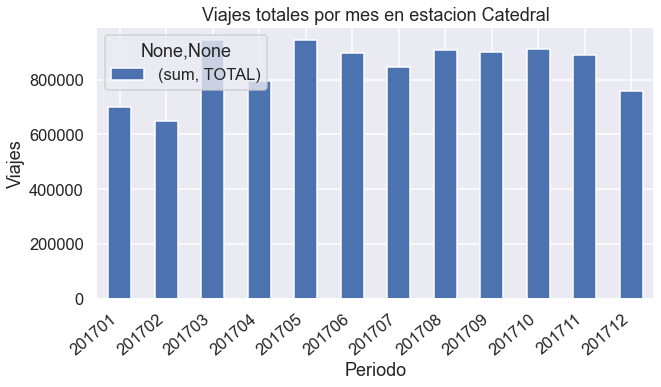

In [250]:
ax2 = linea_d_Catedralxmes.plot(kind='bar',
                                figsize=(10,5),
                                title='Viajes totales por mes en estacion Catedral')

ax2.set_xticklabels(ax2.get_xticklabels(),
                    rotation=40,
                    ha="right")
ax2.set_ylabel('Viajes')
ax2.set_xlabel('Periodo')
plt.show()